# CallBack

학습 도중 로그 출력이나 모델저장 등 다양한 액션을 취할 수 있다.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

In [11]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback

import time

In [13]:
x = np.arange(-1,1,0.01)
np.random.shuffle(x)
y = x**2

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

# 로스 실시간 출력

In [14]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

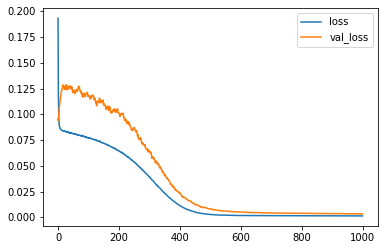

loss =  0.0015166433295235038 , val_loss =  0.003462265245616436


In [15]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

plot_losses = PlotLosses()
# model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1)
model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[plot_losses])


# 모델 저장 - ModelCheckpoint

In [16]:

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

from tensorflow.keras.callbacks import ModelCheckpoint
model_check_point = ModelCheckpoint(
    'best_model.h5', 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True)

# model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1)
model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[model_check_point])


Epoch 00001: val_loss improved from inf to 0.31777, saving model to best_model.h5

Epoch 00002: val_loss improved from 0.31777 to 0.24991, saving model to best_model.h5

Epoch 00003: val_loss improved from 0.24991 to 0.20277, saving model to best_model.h5

Epoch 00004: val_loss improved from 0.20277 to 0.18601, saving model to best_model.h5

Epoch 00005: val_loss improved from 0.18601 to 0.17155, saving model to best_model.h5

Epoch 00006: val_loss improved from 0.17155 to 0.16016, saving model to best_model.h5

Epoch 00007: val_loss improved from 0.16016 to 0.15256, saving model to best_model.h5

Epoch 00008: val_loss improved from 0.15256 to 0.14688, saving model to best_model.h5

Epoch 00009: val_loss improved from 0.14688 to 0.14288, saving model to best_model.h5

Epoch 00010: val_loss improved from 0.14288 to 0.13889, saving model to best_model.h5

Epoch 00011: val_loss improved from 0.13889 to 0.13709, saving model to best_model.h5

Epoch 00012: val_loss improved from 0.13709 to

# 조기 종료 - EarlyStopping

In [17]:

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터링 대상
    verbose=1,
    patience=50)         # 중지까지의 여유분

# model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1)
model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[early_stopping])


Epoch 00051: early stopping


# 학습율 조정 - ReduceLROnPlateau

학습 과정을 모니터링 하면서 진척되지 않으면 학습율을 조정한다.

In [18]:

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])


from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', # 모니터링 대상
    patience=25,        # 대상 기간동안 유지
    factor=0.2,         # 줄이는 양                              
    min_learning_rate=0.00001)     # 최소 학습율

# model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1)
model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[reduce_lr])

# 학습율 조정 - LearningRateScheduler

In [19]:

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

def scheduler(epoch, lr):
  if epoch == 100:
    lr = lr*0.1
    print("learning rate changed at epcoh {} as {}".format(epoch, lr))
  return lr

from tensorflow.keras.callbacks import LearningRateScheduler

lr_scheduler = LearningRateScheduler(scheduler)

# model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1)
model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[lr_scheduler])



learning rate changed at epcoh 100 as 0.0009999999776482583


# 모두 한번에

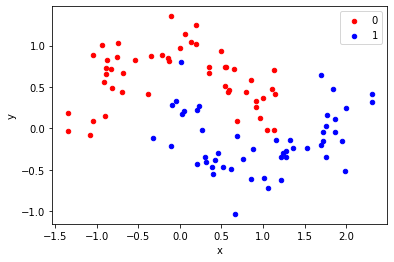

In [20]:
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from matplotlib import pyplot
from pandas import DataFrame

x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

split_index = 30
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]


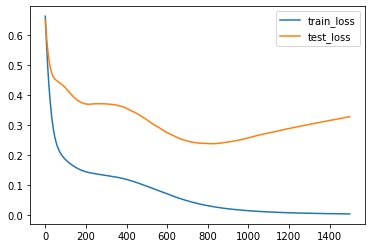

In [21]:
# copy from https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

model = Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=1500, verbose=0)

pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show()


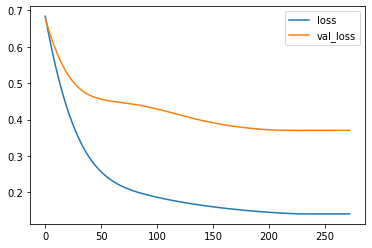

loss =  0.14110393822193146 , val_loss =  0.3704787790775299
Epoch 00273: early stopping


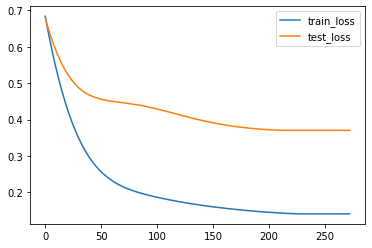

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model = Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss',  save_best_only=True)
plot_losses = PlotLosses()
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_learning_rate=0.001)

callbacks = [model_check_point, plot_losses, early_stopping, reduce_lr]


# history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=1500, verbose=0)
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=1500, verbose=0, callbacks=callbacks)


pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show()
